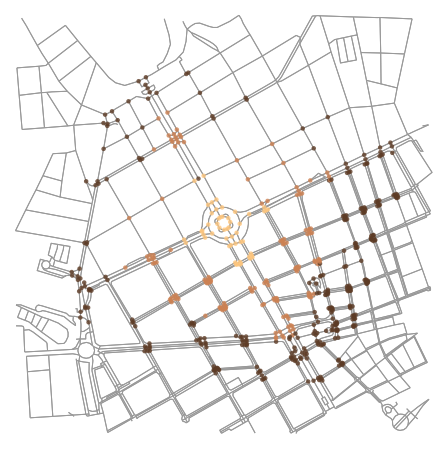

In [7]:
import osmnx as ox

point = (38.3459813, -0.49069405)
dist = 500
networkType = 'walk'

G = ox.graph_from_point(point, network_type=networkType, distance=dist)

center_node = ox.get_nearest_node(G, point)

meters_per_minute = 10 * 1000 / 60 
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute   
    
import networkx as nx
trip_times = [1, 2, 3] 

iso_colors = ox.get_colors(n=len(trip_times), cmap='copper', start=0.3, return_hex=True)
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color 
        
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [20 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)

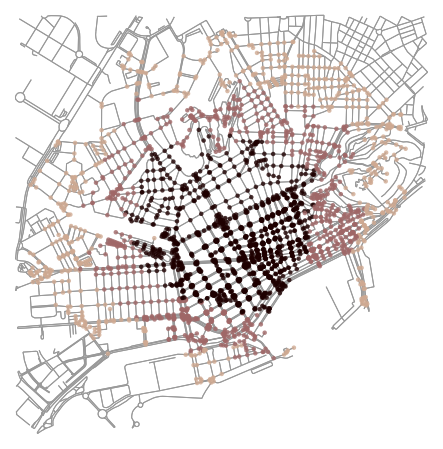

In [9]:
G = ox.graph_from_point((38.3459813, -0.49069405), distance=1500, network_type='walk')

center_node = ox.get_nearest_node(G, (38.3459813, -0.49069405))

meters_per_minute = 5 * 1000 / 60 
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute
    
trip_times = [10, 15, 20] 

iso_colors = ox.get_colors(n=len(trip_times), cmap='pink_r', start=0.5, return_hex=True)
node_colors = {}

radius_value = trip_times

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')  
    for node in subgraph.nodes():
        node_colors[node] = color 
        
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [20 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)

In [3]:
#Stats of nodes
stats = ox.stats.basic_stats(G, area=None, clean_intersects=False, tolerance=15, circuity_dist='gc')
stats

{'n': 3375,
 'm': 10676,
 'k_avg': 6.326518518518519,
 'intersection_count': 3170,
 'streets_per_node_avg': 3.204148148148148,
 'streets_per_node_counts': {0: 0,
  1: 205,
  2: 0,
  3: 2095,
  4: 1053,
  5: 20,
  6: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.06074074074074074,
  2: 0.0,
  3: 0.6207407407407407,
  4: 0.312,
  5: 0.005925925925925926,
  6: 0.0005925925925925926},
 'edge_length_total': 504441.1239999982,
 'edge_length_avg': 47.25001161483685,
 'street_length_total': 253938.1259999998,
 'street_length_avg': 47.49170114082659,
 'street_segments_count': 5347,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0642739884252317,
 'self_loop_proportion': 0.0016860247283626826,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [4]:
#Stats of colored nodes
stats = ox.stats.basic_stats(subgraph, area=None, clean_intersects=False, tolerance=15, circuity_dist='gc')
stats

{'n': 12,
 'm': 28,
 'k_avg': 4.666666666666667,
 'intersection_count': 12,
 'streets_per_node_avg': 901.1666666666666,
 'streets_per_node_counts': {0: 0,
  1: 205,
  2: 0,
  3: 2095,
  4: 1053,
  5: 20,
  6: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 17.083333333333332,
  2: 0.0,
  3: 174.58333333333334,
  4: 87.75,
  5: 1.6666666666666667,
  6: 0.16666666666666666},
 'edge_length_total': 1828.8460000000002,
 'edge_length_avg': 65.31592857142859,
 'street_length_total': 914.423,
 'street_length_avg': 65.31592857142857,
 'street_segments_count': 14,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0000496732115016,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}